# Data Visualization: Ford Go Bike 
## by Oladayo Oladipupo

## Introduction
> This dataset represents trips taken by members of the service for month of February of 2019. It contains info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.



## Preliminary Wrangling

This document explores a dataset including time, stations, and users' attributes for 519,700 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Import Ford GoBike csv file into jupyter notebook
fordgo = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
fordgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
fordgo.shape

(183412, 16)

In [5]:
fordgo.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
fordgo.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
#check for duplicate data

fordgo.duplicated().sum()

0

In [8]:
#check for null values

fordgo.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# convert the datatype of date to timestamp
fordgo.start_time = pd.to_datetime(fordgo['start_time'])
fordgo.end_time = pd.to_datetime(fordgo['end_time'])

In [10]:
# drop NaN value

fordgo.dropna(inplace = True)

In [11]:
fordgo.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
#convert `start_station_id`,`end_station_id` and `member_birth_year` from floats to int

fordgo['start_station_id'] = fordgo['start_station_id'].astype(int)
fordgo['end_station_id'] = fordgo['end_station_id'].astype(int)
fordgo['member_birth_year'] = fordgo['member_birth_year'].astype(int)

In [13]:
fordgo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [14]:
# convert duration from per seconds to per minutes

fordgo['duration_min'] = round(fordgo['duration_sec']/60 , 2)

In [15]:
fordgo.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.75
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.90
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.42
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.88


In [16]:
#remove columns that are not useful for analysis
columns= ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude' ,'start_station_id','end_station_id']
fordgo.drop(columns, axis=1, inplace=True)
fordgo.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,869.75
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,1030.90
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,608.17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,26.42
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,29.88


In [17]:
#convert more columns with wrong datatypes
fordgo['bike_id'] = fordgo['bike_id'].astype(str)
fordgo['user_type'] = fordgo['user_type'].astype('category')
fordgo['member_gender'] = fordgo['member_gender'].astype('category')
fordgo['member_birth_year'] = fordgo['member_birth_year'].astype(object)

In [18]:
fordgo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  object        
 6   user_type                174952 non-null  category      
 7   member_birth_year        174952 non-null  object        
 8   member_gender            174952 non-null  category      
 9   bike_share_for_all_trip  174952 non-null  object        
 10  duration_min             174952 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(1), int64(1), object(5)
memory usag

In [19]:
# Number of bikes in the dataset
fordgo.bike_id.nunique()

4607

### What is the structure of your dataset?

> There are 183412 rows (fordgobike trips), 16 columns comprising of (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Also there are 4646 bikes available in the dataset. 

### What is/are the main feature(s) of interest in your dataset?

> The major interest for me is to find out the variables impacting the duration of the trip by the bikes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>From my basic observation I think the trip duration is majorly impacted by the start stations and end stations also user_type, birthyear and gender should also affect trip duration.

## Univariate Exploration


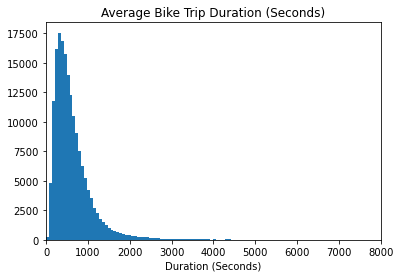

In [20]:
#Plotting of the average trip duration per seconds.

bin_edges = np.arange(0, fordgo['duration_sec'].max() + 100 , 70)
plt.hist(data = fordgo , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');

In [21]:
fordgo['duration_min'] = fordgo['duration_sec'] / 60

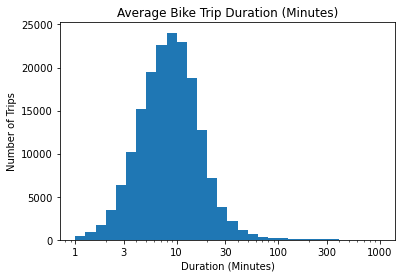

In [22]:
#Let's put it into log scale for better look at the distrubtion
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(b) for b in ticks]
plt.hist(data = fordgo , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

Our observation from this clearly shows that majority of the ride peaks around 10minutes.

Text(0.5, 0, 'Birth year')

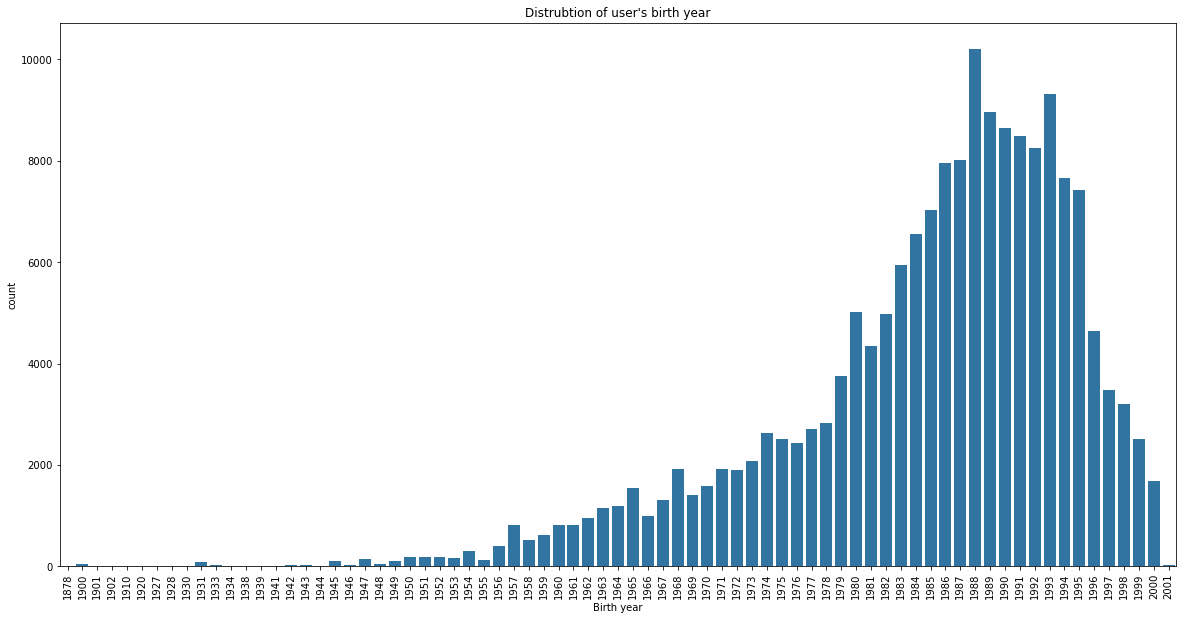

In [23]:
# Riders distribution based on birth year
birthYears = fordgo['member_birth_year'].value_counts()
order_index = np.sort(birthYears.index)
base_color = sb.color_palette()[0]
plt.figure(figsize=(20 , 10))
plt.xticks(rotation = 90)
plt.title("Distrubtion of user's birth year")
sb.countplot(data = fordgo , x = 'member_birth_year', color = base_color , order = order_index );
plt.xlabel('Birth year')

We have a lot of riders born between 1988 and 1993

In [24]:
#create member age as at 2019 column

fordgo['member_age'] = 2019 - fordgo['member_birth_year']

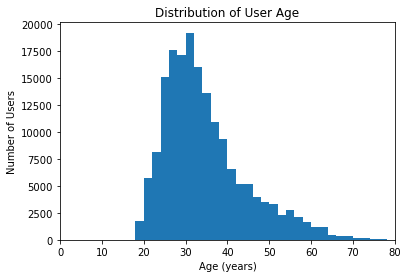

In [25]:
# The age distribution derived from member's birth year.
bin_size = 2
bins = np.arange(0, fordgo['member_age'].max()+ bin_size, bin_size)
plt.hist(data = fordgo.dropna(), x = 'member_age', bins = bins)
plt.xlim(0,80)
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users');

From this viz we can see that majority of the riders are between 20 to 40, which is the expected category to ride a bike including university students and workers, however, there is also a significant fraction of relatively old people who ride bikes which are few outliers around the age of 70

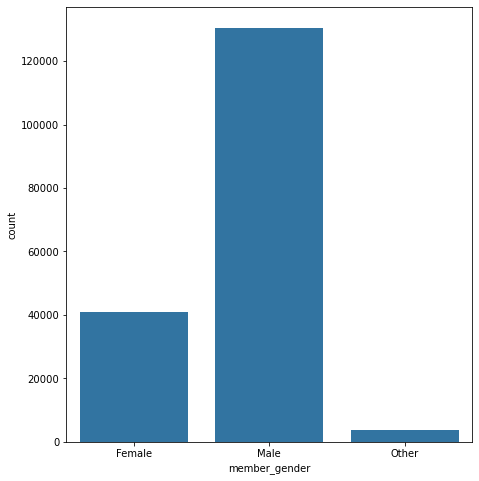

In [26]:
#The distrubtion of the riders based on gender
plt.figure(figsize=(16, 8)) 
plt.subplot(1,2,1)
sb.countplot(data = fordgo , x = 'member_gender', color = base_color );

We have alot of male riders than female riders.

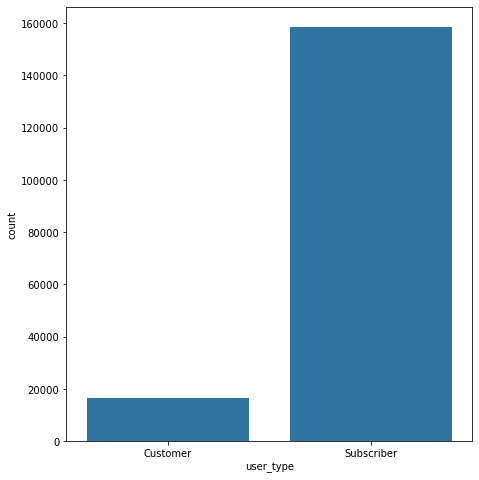

In [27]:
# The distrubtion of types of users.
plt.figure(figsize=(16, 8)) 
plt.subplot(1,2,2)
sb.countplot(data = fordgo , x = 'user_type', color = base_color );

We can see that the majority of trips are led by Subscribers rather than Customers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was a need to transform the data from seconds to minutes to get more insight into the time used by riders. 
> Also I needed to create a member_age column to get insight into the age of the riders as at 2019

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Looking at the distrubtion of birth year was challenging, so with a little guidance I came to the idea of looking at the distrubtion by age and to do so, I converted to it by substracting the birth year from current year which gave us a better perception of the impact of age on the trip duration.

## Bivariate Exploration

> Looking at the correlation between the trip duration and the riders age.

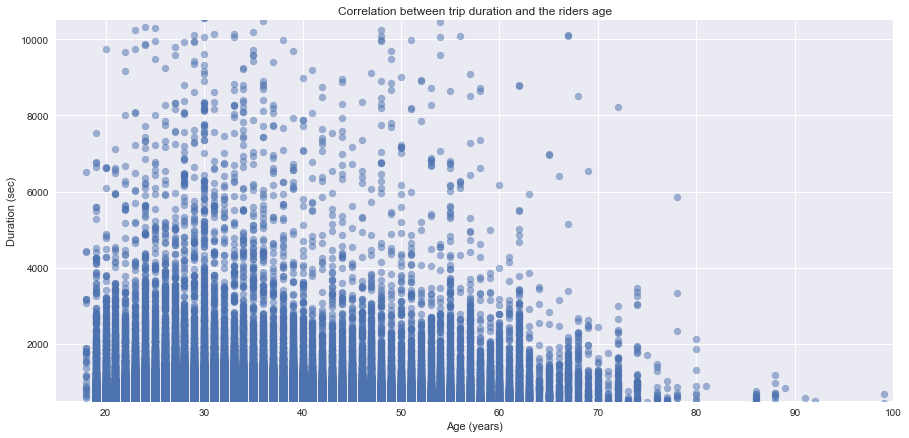

In [35]:
plt.figure(figsize=[15,7])
plt.scatter(fordgo['member_age'], fordgo['duration_sec'], alpha = 0.5, marker = 'o' )
plt.axis([-5, 115, 500, 10500])
plt.xlim(15, 100)
plt.style.use('seaborn')
plt.title("Correlation between trip duration and the riders age")
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)');

Riders between the age of 20 - 60 years cover above 6000 secs while there is a significant drop in duration by riders above 60 years.

C:\Users\olada\AppData\Local\Temp\ipykernel_15688\632908233.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(fordgo['member_age'], fordgo['duration_sec'],
C:\Users\olada\AppData\Local\Temp\ipykernel_15688\632908233.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=[10000, 20000, 30000, 40000])


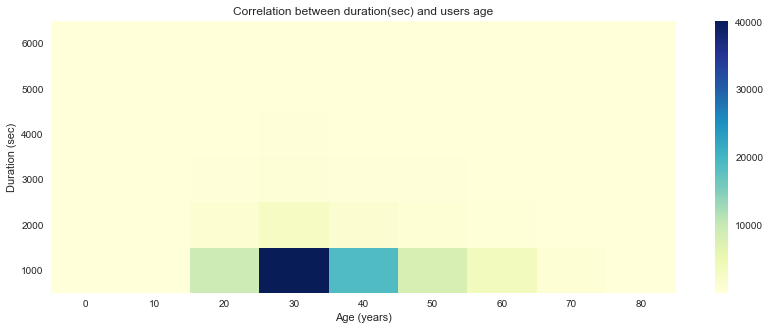

In [36]:
plt.figure(figsize=[14,5])
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(fordgo['member_age'], fordgo['duration_sec'],
           bins = [bins_x, bins_y],cmap='YlGnBu')
plt.colorbar(ticks=[10000, 20000, 30000, 40000])
plt.title("Correlation between duration(sec) and users age")
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)');

We can confirm from this that there is a high concertation of bikers within the age of 30 years.

**Let us check for the correlation between the trip duration and gender.**

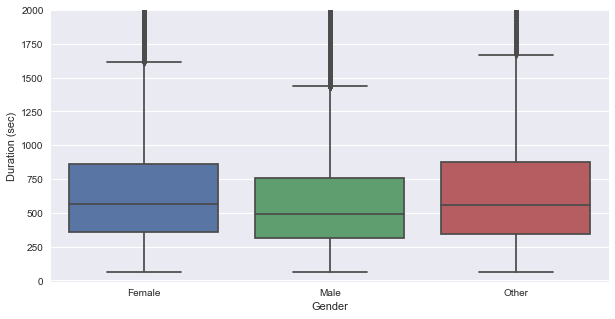

In [30]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = fordgo, x = 'member_gender', y = 'duration_sec')
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)');

More females and other gender spent more time riding than the male 

**Let us check for the correlation between the trip duration and user type.**

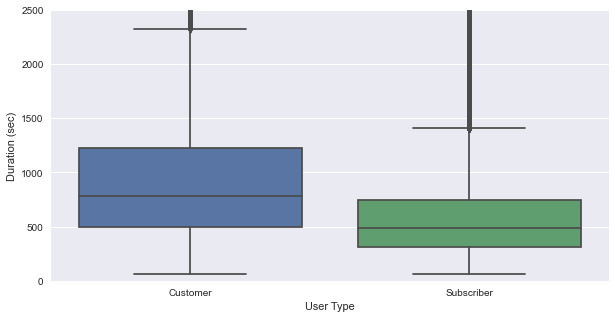

In [31]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = fordgo, x = 'user_type', y = 'duration_sec')
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)');

More customers took longer trips than subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected, the age of the biker affected the time of trip. We can see that more bikers within the younger age have more time spent than the older bikers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Gender: From the observation, male users are more than the others (other gender and female) but diving deeper revealed that while males take more trips, females and other gender have higher percentage of leading a longer trip than males.

> User Type: While Subscribers have higher number of users than the customer, looking at the correlation regarding longer durations of trips led to the conclusion that customers have higher percentage of leading a longer duration.

## Multivariate Exploration


**Here we want to know which gender takes more rides compared to age**

In [32]:
fordgo.member_gender.unique()

['Male', 'Other', 'Female']
Categories (3, object): ['Female', 'Male', 'Other']

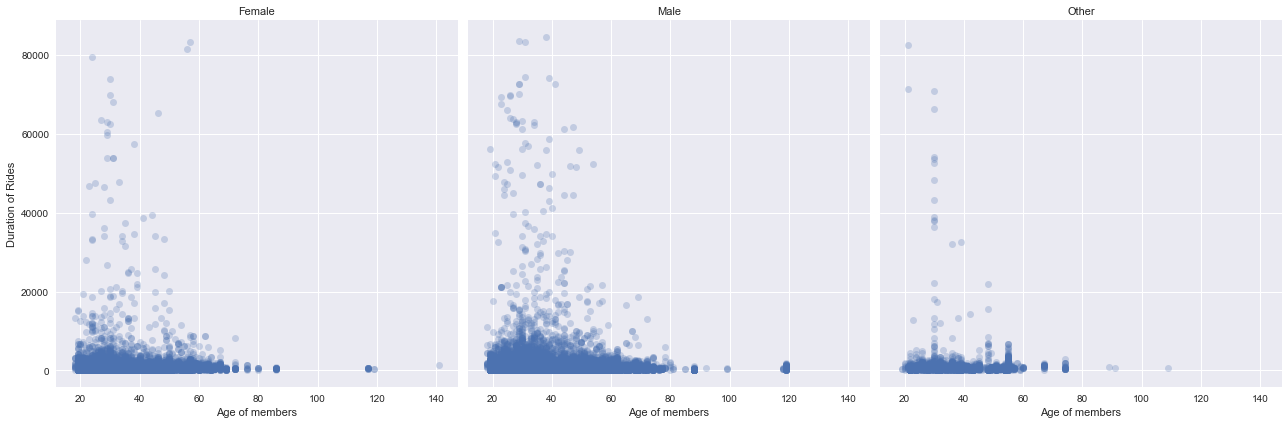

In [33]:
g = sb.FacetGrid(data = fordgo, col = 'member_gender', height = 6,
                 col_wrap = 3)
g.map(sb.regplot, 'member_age', 'duration_sec', y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/4})
g.set_ylabels('Duration of Rides')
g.set_xlabels('Age of members')
g.set_titles('{col_name}');

Male between the age of 20 - 60 covers more duration than older male, also worthy of note is that there are few male riders within the age of 120. Another noticeable info is that we have female riders around the age of 140 which isn't noticeable in other genders.

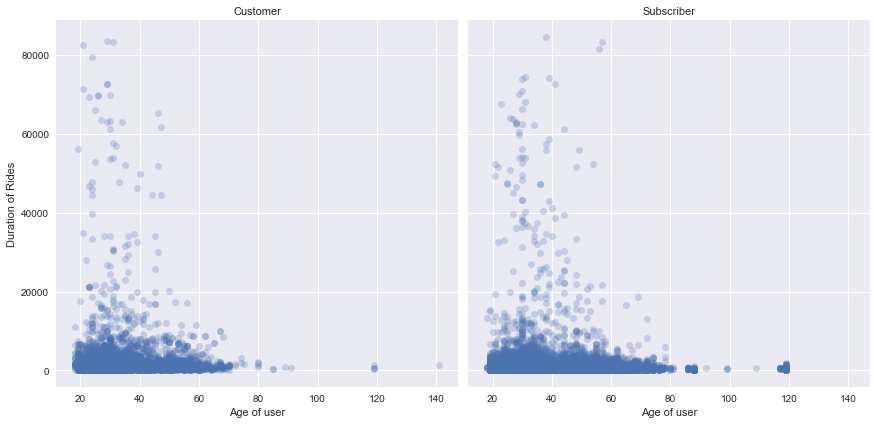

In [34]:
g = sb.FacetGrid(data = fordgo, col = 'user_type', height = 6,
                 col_wrap = 3)
g.map(sb.regplot, 'member_age', 'duration_sec', y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/4})
g.set_ylabels('Duration of Rides')
g.set_xlabels('Age of user')
g.set_titles('{col_name}');

Both Customer and Subscriber have similar trends for age and trip duration

It's also noticeable that there is a slightly higher age for subscribers having higher duration trips than customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We can reach the conclution that even though the number of higher duration trip is higher for male but percentage is higher for women and other, also other has one more peak at nearly the age of 60 years for higher duration time.

> Regarding different user types, both are showing similar trends for age and trip duration. But there is slight tilt to higher age for subscribers having better trip duration.

### Were there any interesting or surprising interactions between features?

> The peak for other gender at older age.

> The slight tilt to higher age for subscribers having better trip duration.

## Conclusions
> The duration used in riding bike has a correlation with the age of the rider, with more riders within the younger age bracket of 20 - 40 spending more time than the bikers older than 40.
